In [26]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats


In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

All of our Google Drive files look the same, so that's where we are pulling our data from.

In [28]:
import os

# data_path = "/content/drive/MyDrive/cadence 1a/data"
# print(os.listdir(data_path))

We read the resume dataset and do some preliminary analysis to see howw it looks. We look at the null values, the number of columns and rows, as well as the sum of null values. We proceed to do the same for the job posts dataset.

In [29]:
# resume_df = pd.read_csv(f"{data_path}/resumes.csv")
resume_df = pd.read_csv("../data/original/resumes.csv")
resume_df.shape
resume_df.head()
# resume_df.isnull().sum()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [30]:
# job_posts_df = pd.read_csv(f"{data_path}/jobs.csv")
job_posts_df = pd.read_csv("../data/original/jobs.csv")
job_posts_df.shape
job_posts_df.head()
# job_posts_df.isnull().sum()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


Columns that have missing values in the job posts dataset are being turned into a list.

In [31]:
condition = job_posts_df.isnull().sum() != 0
job_posts_df.isnull().sum()[condition].index
columnlist = list(job_posts_df.isnull().sum()[condition].index)
columnlist

['Title',
 'Company',
 'AnnouncementCode',
 'Term',
 'Eligibility',
 'Audience',
 'StartDate',
 'Duration',
 'Location',
 'JobDescription',
 'JobRequirment',
 'RequiredQual',
 'Salary',
 'ApplicationP',
 'OpeningDate',
 'Deadline',
 'Notes',
 'AboutC',
 'Attach']

There are no numerical values in this data set; everything is stored in string/object format.

In [32]:
job_posts_df[columnlist].dtypes

Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
dtype: object

## Addressing Null values in job_posts_df
Since there are many columns in job_posts_df with null values, we can use reasoning to drop some of the rows or columns. Some columns can be cut if they have too many null values or if they are not really relevant to the problem.  For example, the column "AnnouncementCode" has 17793 null values and the unique non-null values are a random string of letters. It was most likely used to identify the job posting on its original website. As well, "Opening Date" and "Deadline" may not have many null values, but these values might not be very useful to determine whether or not a candidate would be a good fit for a job.

In [33]:
columns_to_drop = ['AnnouncementCode', 'Term', 'Eligibility', 'Audience', 'StartDate', 'Duration', 'OpeningDate', 'Deadline', 'Notes', 'Attach']
job_posts_df = job_posts_df.drop(columns=columns_to_drop)
job_posts_df.isnull().sum()

jobpost              0
date                 0
Title               28
Company              7
Location            32
JobDescription    3892
JobRequirment     2522
RequiredQual       484
Salary            9379
ApplicationP        60
AboutC            6531
Year                 0
Month                0
IT                   0
dtype: int64

There are still null values, but the columns are too contextually important to the ML problem. We can drop the examples that have null values in these columns since they most likely do not have the information we need to train the model accurately. After we drop these rows, our job_posts_df dataset no longer has any null values.

In [34]:
columns_to_check = ['Title', 'JobDescription', 'JobRequirment', 'Company', 'Location', 'RequiredQual', 'Salary', 'AboutC']

job_posts_df = job_posts_df.dropna(subset=columns_to_check)

job_posts_df.shape

(5459, 14)

In [35]:
job_posts_df.isnull().sum()

jobpost           0
date              0
Title             0
Company           0
Location          0
JobDescription    0
JobRequirment     0
RequiredQual      0
Salary            0
ApplicationP      0
AboutC            0
Year              0
Month             0
IT                0
dtype: int64

Removing duplicates from both datasets.

In [36]:
job_posts_df = job_posts_df.drop_duplicates()
print(job_posts_df.duplicated().sum())
resume_df = resume_df.drop_duplicates()
print(resume_df.duplicated().sum())

0
0


Finding columns with HTML tags. No column in job post has any HTML tags we need to remove. Only resume.

In [37]:
import re
def has_html(text):
    if isinstance(text, str):
        return bool(re.search(r'<.*?>', text))
    return False

In [38]:
columns_with_html = [col for col in job_posts_df.columns if job_posts_df[col].apply(has_html).any()]
print(columns_with_html)

columns_with_html = [col for col in resume_df.columns if resume_df[col].apply(has_html).any()]
print(columns_with_html)

[]
['Resume_str', 'Resume_html']


In [39]:
import re
def clean_html(text):
  return re.sub('<[^<]+?>', '', text)

resume_df['Resume_html'] = resume_df['Resume_str'].apply(clean_html)

Resume_html and Resume_str are the same column

In [40]:
resume_df[['Resume_html', 'Resume_str']].head()
resume_df.drop(columns=['Resume_html'], inplace= True)

Creates a corpus for all job post related details

In [41]:
job_posts_df["job_text"] = (
    "Description: " + job_posts_df["JobDescription"].fillna('') + " "
    "Requirements: " + job_posts_df["JobRequirment"].fillna('') + " "
    "Qualifications: " + job_posts_df["RequiredQual"].fillna('') + " "
    "About Company: " + job_posts_df["AboutC"].fillna('')
)
display(job_posts_df[["Title", "job_text"]].head())


,Title,job_text
185,Secretary / office helper,"Description: Secretary office helper, Typing t..."
242,Cheif Accountant,Description: Keeping complete accounting of th...
271,Sales representative,Description: Distribution of cosmetic and laun...
297,Research Analyst,Description: Japonica Intersectoral is seeking...
298,Procurement Specialist,Description: - Developing Procurement Plans (b...


# Checkpoint #2 - Text Normalization
Apply tokenization, lowercasing, stopword removal, and lemmatization.

Import NLP and text-processing tools:
- nltk for natural language processing utilities (downloads WordNet for lemmatization)
- TfidfVectorizer and ENGLISH_STOP_WORDS from sklearn to convert text into numerical features and remove common stop words
- WordNetLemmatizer to reduce words to their base (dictionary) form
- word_tokenize: splits sentences into individual words
- stopwords: provides common words (like "the", "and") to remove from text

In [42]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Make sure NLTK resources are available

In [43]:
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malihatasnim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Initialize the WordNet lemmatizer and define a set of English stopwords for text cleaning

In [44]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


 TEXT PREPROCESSING PIPELINE FOR RESUMES AND JOB POSTS

 Purpose:
   This section standardizes and cleans all text data to prepare it
   for accurate keyword and semantic matching in the scoring system.

 Description:
   The preprocess_text() function normalizes text by performing:
     1. Lowercasing – ensures consistent word comparisons.
     2. Tokenization – splits text into individual words.
     3. Stopword removal – removes common filler words like "the", "and", "is".
     4. Filtering – keeps only alphabetic tokens (drops numbers/punctuation).
     5. Lemmatization – reduces words to their base form
        (e.g., “running” → “run”, “analyses” → “analysis”).
     6. Reconstruction – joins cleaned tokens back into a single string.

   This preprocessing is applied to:
     • resume_df["Resume_str"]  → creates resume_df["Resume_clean"]
     • job_posts_df["job_text"] → creates job_posts_df["job_text_clean"]

 Outcome:
   Produces standardized, lemmatized, and stopword-free text columns
   for both resumes and job postings, enabling fair and consistent#   matching in later scoring functions.


In [45]:
def preprocess_text(text):
    """Lowercase, tokenize, remove stopwords, and lemmatize."""
    tokens = word_tokenize(str(text).lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

resume_df["Resume_clean"] = resume_df["Resume_str"].apply(preprocess_text)
job_posts_df['job_text_clean'] = job_posts_df['job_text'].apply(preprocess_text)

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

resume_embeddings = model.encode(resume_df["Resume_clean"].tolist(), show_progress_bar=True)
job_embeddings = model.encode(job_posts_df["job_text_clean"].tolist(), show_progress_bar=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 171/171 [01:28<00:00,  1.93it/s]


In [46]:
import numpy as np
import pickle

# ✅ Save
np.save("resume_embeddings.npy", resume_embeddings)
np.save("job_embeddings.npy", job_embeddings)
resume_df.to_csv("Resume_cleaned.csv", index=False)
job_posts_df.to_csv("Jobs_cleaned.csv", index=False)

# ✅ Load
resume_embeddings = np.load("resume_embeddings.npy")
job_embeddings = np.load("job_embeddings.npy")
resume_df = pd.read_csv("Resume_cleaned.csv")
job_posts_df = pd.read_csv("Jobs_cleaned.csv")


In [47]:
import numpy as np

print("Embedding shape:", job_embeddings.shape)
print("Mean vector norm:", np.mean(np.linalg.norm(job_embeddings, axis=1)))
print("Variance per dimension:", np.var(job_embeddings, axis=0)[:10])  # first 10 dims


Embedding shape: (5448, 384)
Mean vector norm: 1.0
Variance per dimension: [0.00116457 0.00097213 0.00085216 0.00106113 0.0014709  0.00137813
 0.00135616 0.00109033 0.00113979 0.00090508]


In [48]:
# Check for duplicate embeddings (identical vectors)
duplicates = np.unique(job_embeddings, axis=0).shape[0]
print(f"Unique embeddings: {duplicates}/{job_embeddings.shape[0]}")


Unique embeddings: 4979/5448


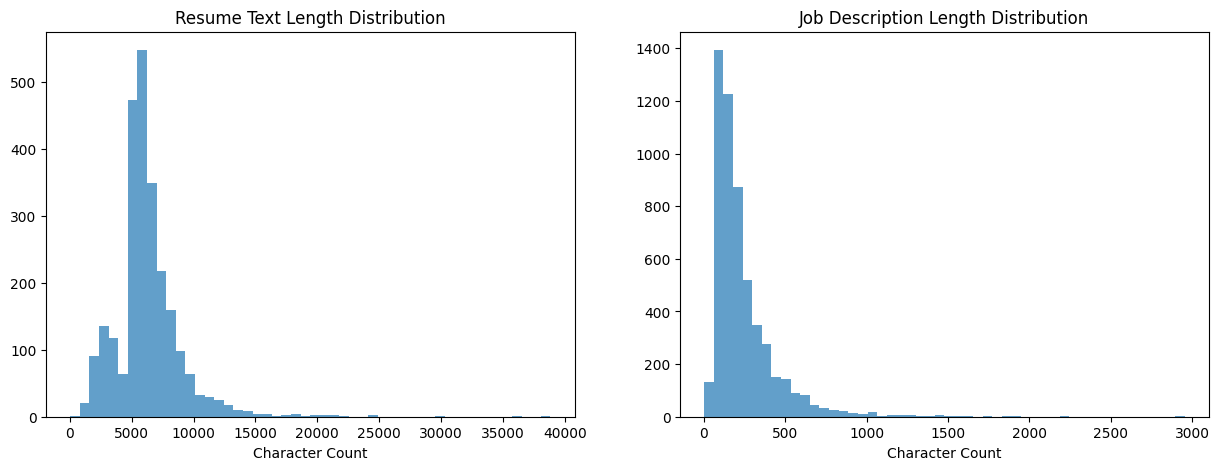

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

resume_lengths = resume_df['Resume_str'].str.len()
job_lengths = job_posts_df['JobDescription'].str.len()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(resume_lengths, bins=50, alpha=0.7)
ax1.set_title('Resume Text Length Distribution')
ax1.set_xlabel('Character Count')

ax2.hist(job_lengths, bins=50, alpha=0.7)
ax2.set_title('Job Description Length Distribution')
ax2.set_xlabel('Character Count')
plt.show()

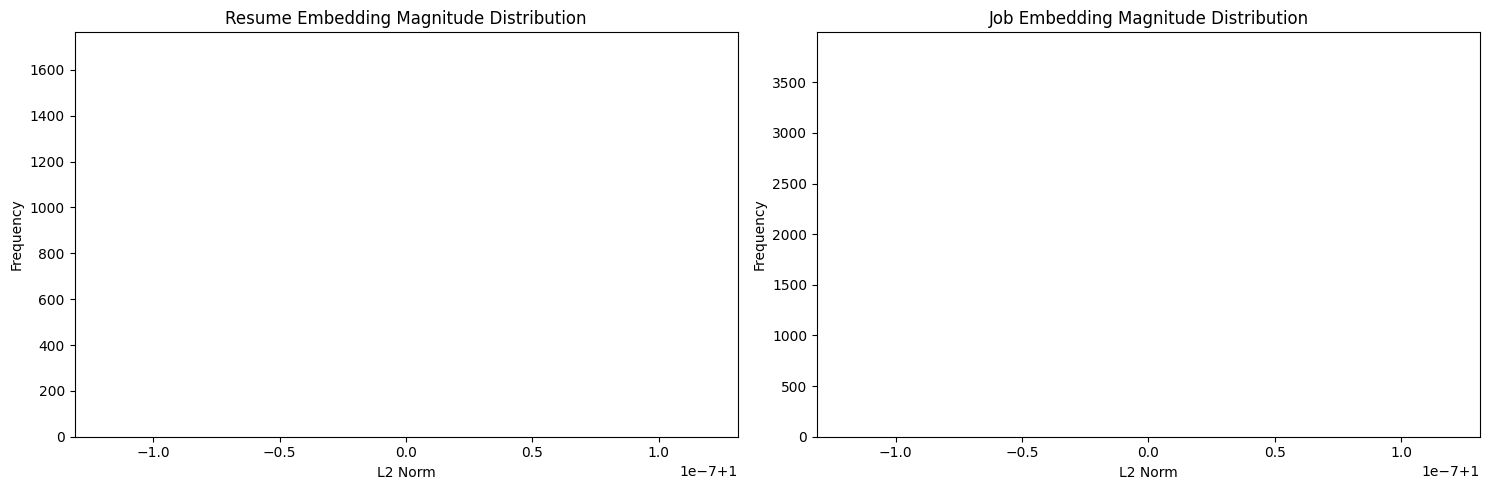

In [50]:
import matplotlib.pyplot as plt
import numpy as np

resume_norms = np.linalg.norm(resume_embeddings, axis=1)
job_norms = np.linalg.norm(job_embeddings, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(resume_norms, bins=50, alpha=0.7, color='skyblue')
ax1.set_title('Resume Embedding Magnitude Distribution')
ax1.set_xlabel('L2 Norm')
ax1.set_ylabel('Frequency')

ax2.hist(job_norms, bins=50, alpha=0.7, color='salmon')
ax2.set_title('Job Embedding Magnitude Distribution')
ax2.set_xlabel('L2 Norm')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [51]:
# check the first few norms directly
np.linalg.norm(job_embeddings, axis=1)[:10]


array([1.        , 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

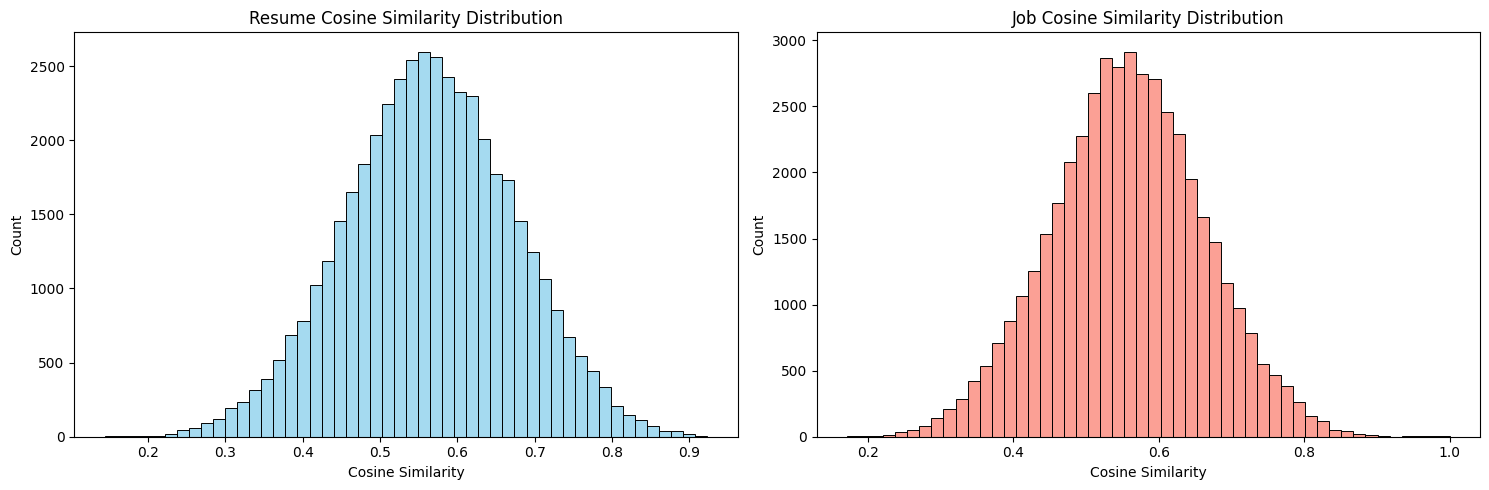

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

# sample for speed
sample_resume = resume_embeddings[np.random.choice(len(resume_embeddings), 300, replace=False)]
sample_job = job_embeddings[np.random.choice(len(job_embeddings), 300, replace=False)]

resume_sim = cosine_similarity(sample_resume)
job_sim = cosine_similarity(sample_job)

# use only upper triangle (unique pairs)
resume_sims = resume_sim[np.triu_indices_from(resume_sim, k=1)]
job_sims = job_sim[np.triu_indices_from(job_sim, k=1)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(resume_sims, bins=50, ax=ax1, color='skyblue')
ax1.set_title("Resume Cosine Similarity Distribution")
ax1.set_xlabel("Cosine Similarity")

sns.histplot(job_sims, bins=50, ax=ax2, color='salmon')
ax2.set_title("Job Cosine Similarity Distribution")
ax2.set_xlabel("Cosine Similarity")

plt.tight_layout()
plt.show()


[('state', 15935), ('city', 14977), ('company', 14161), ('name', 11658), ('management', 8016), ('customer', 7455), ('business', 7163), ('sales', 6366), ('new', 6292), ('skills', 5865), ('team', 5207), ('experience', 5019), ('project', 4720), ('service', 4528), ('training', 4488), ('work', 4305), ('development', 4039), ('information', 3844), ('education', 3768), ('financial', 3765), ('including', 3745), ('professional', 3640), ('manager', 3636), ('marketing', 3411), ('data', 3364), ('support', 3303), ('managed', 3279), ('university', 3188), ('staff', 3079), ('developed', 2996), ('management,', 2960), ('office', 2855), ('microsoft', 2726), ('current', 2714), ('process', 2706), ('product', 2696), ('responsible', 2675), ('maintained', 2616), ('system', 2594), ('quality', 2529), ('ensure', 2458), ('design', 2436), ('high', 2414), ('customers', 2346), ('client', 2331)]
[('looking', 1720), ('responsible', 1660), ('position', 1313), ('development', 1283), ('incumbent', 1279), ('seeking', 1236)

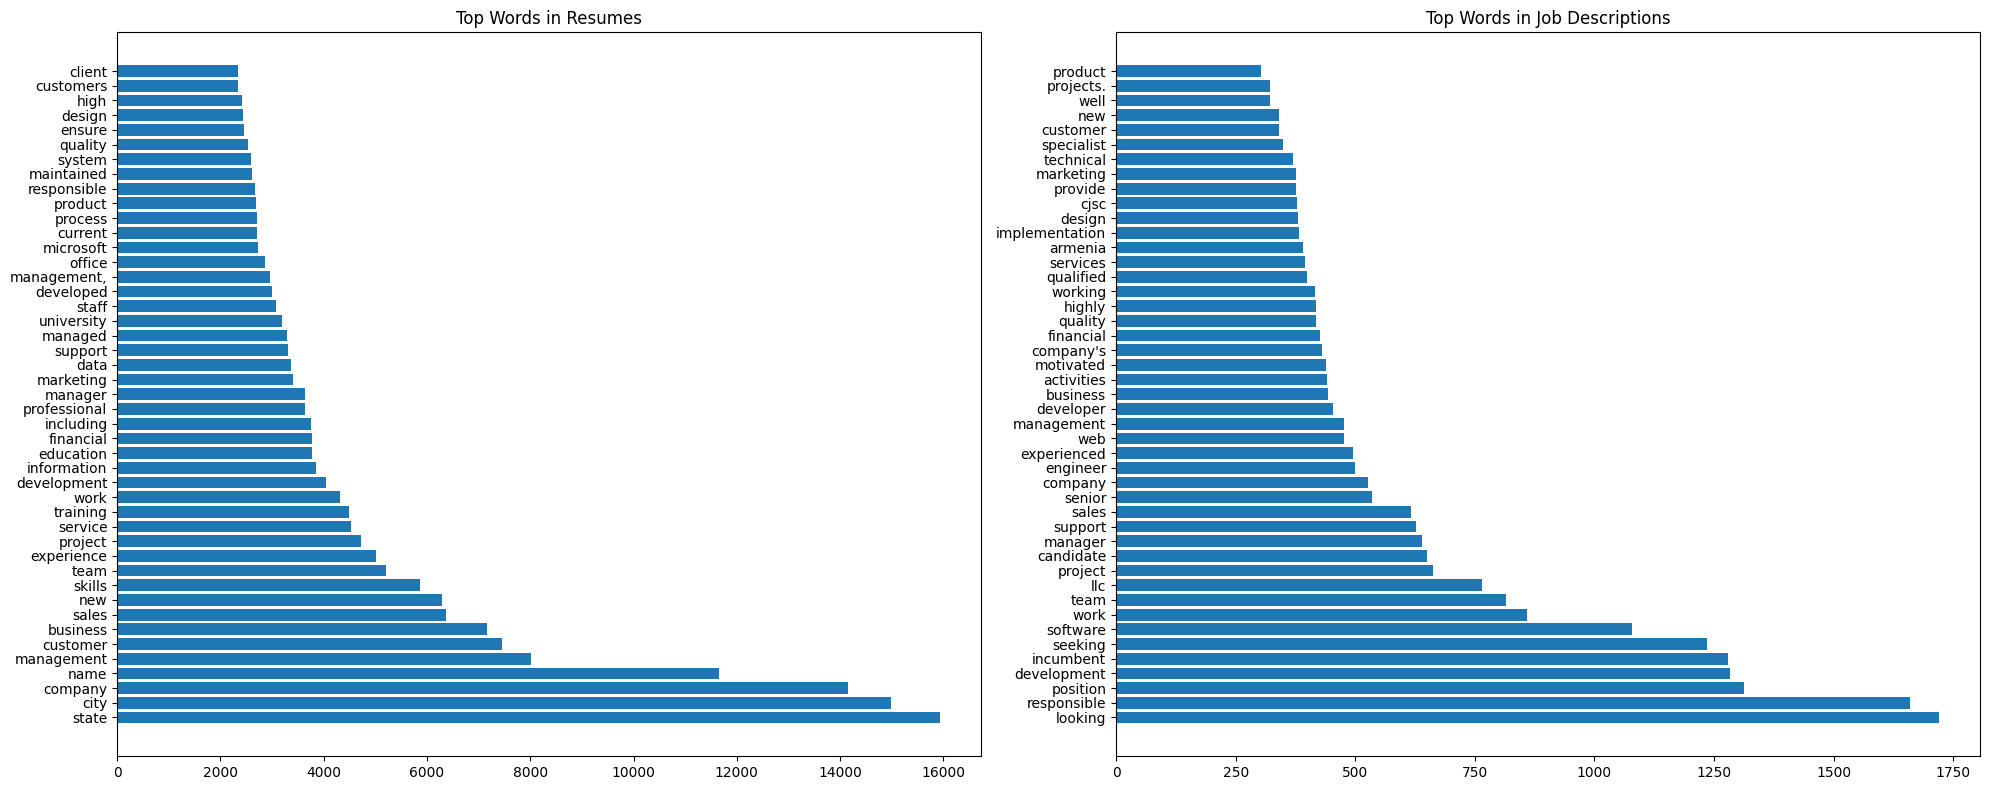

In [53]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get most common words in resumes and job postings
def get_top_words(text_series, n=45):
    all_words = ' '.join(text_series).lower().split()
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
    return Counter(filtered_words).most_common(n)

top_resume_words = get_top_words(resume_df['Resume_str'])
top_job_words = get_top_words(job_posts_df['JobDescription'])
print(top_resume_words)
print(top_job_words)
# Plot word frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

words, counts = zip(*top_resume_words)
ax1.barh(words, counts)
ax1.set_title('Top Words in Resumes')

words, counts = zip(*top_job_words)
ax2.barh(words, counts)
ax2.set_title('Top Words in Job Descriptions')
plt.tight_layout()
plt.show()

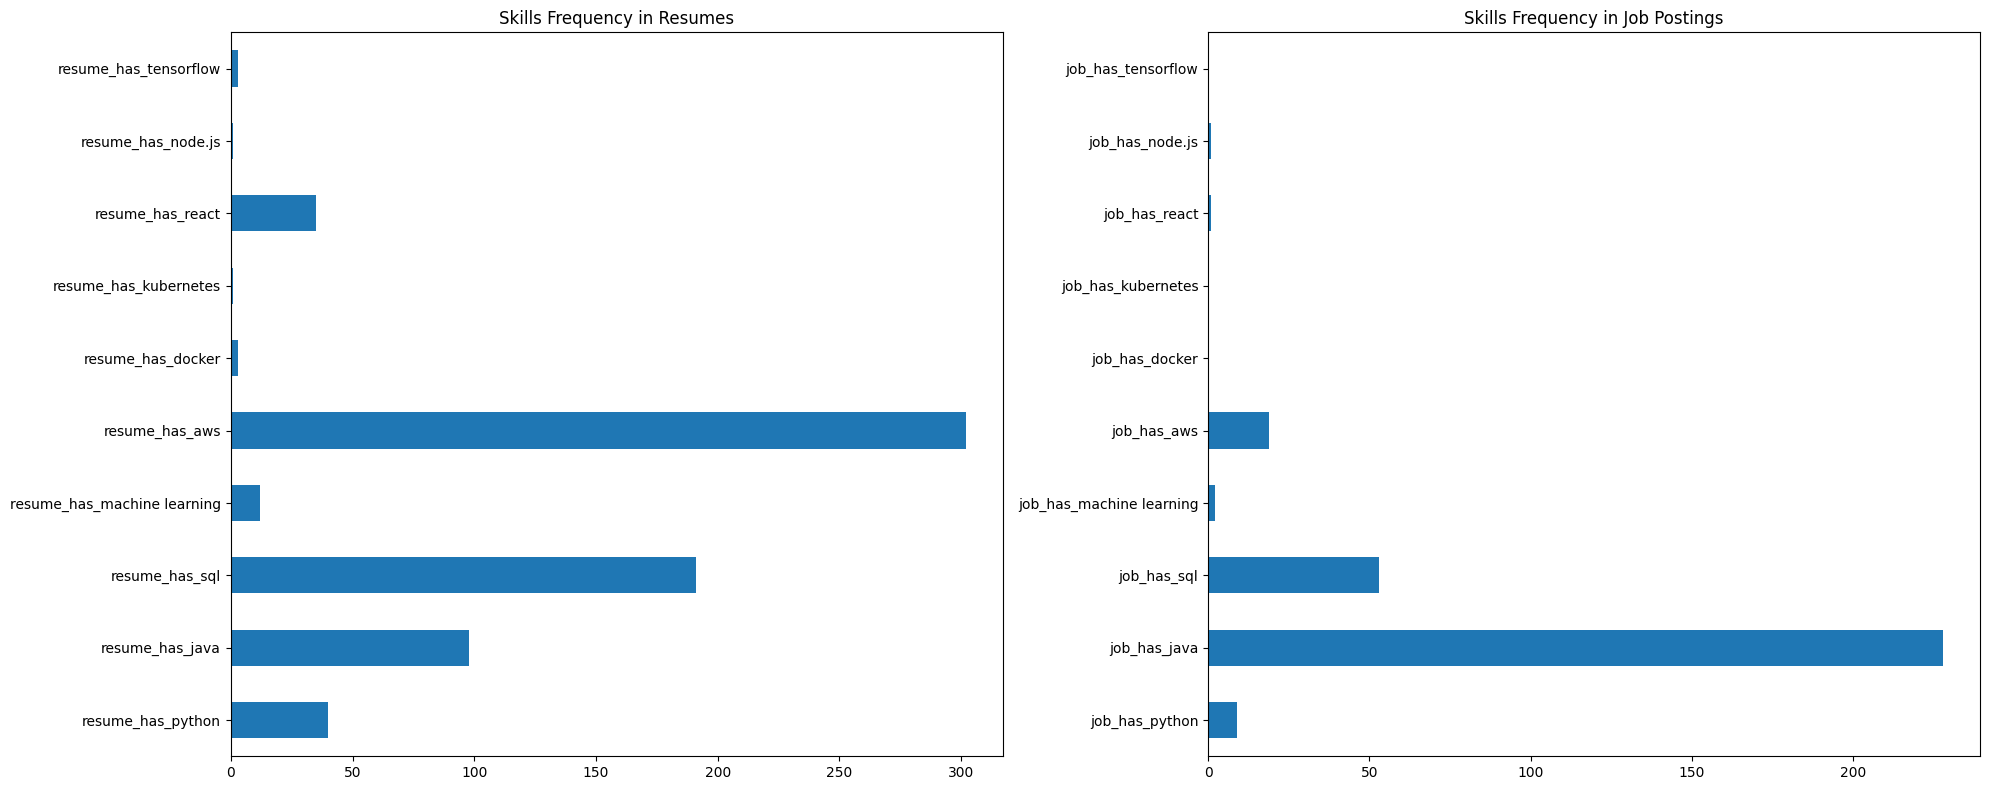

In [54]:
# Common skills extraction (simplified)
# Add/update list with keywords we are interested in
skills_keywords = ['python', 'java', 'sql', 'machine learning', 'aws',
                   'docker', 'kubernetes', 'react', 'node.js', 'tensorflow']

def count_skills(text, skills_list):
    text_lower = text.lower()
    return sum(1 for skill in skills_list if skill in text_lower)

# Count skills in resumes and job postings
for skill in skills_keywords:
    resume_df[f'resume_has_{skill}'] = resume_df['Resume_str'].str.lower().str.contains(skill)
    job_posts_df[f'job_has_{skill}'] = job_posts_df['JobDescription'].str.lower().str.contains(skill)

# Plot skills frequency
resume_skills_count = resume_df[[f'resume_has_{skill}' for skill in skills_keywords]].sum()
job_skills_count = job_posts_df[[f'job_has_{skill}' for skill in skills_keywords]].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
resume_skills_count.plot(kind='barh', ax=ax1)
ax1.set_title('Skills Frequency in Resumes')
job_skills_count.plot(kind='barh', ax=ax2)
ax2.set_title('Skills Frequency in Job Postings')
plt.tight_layout()
plt.show()

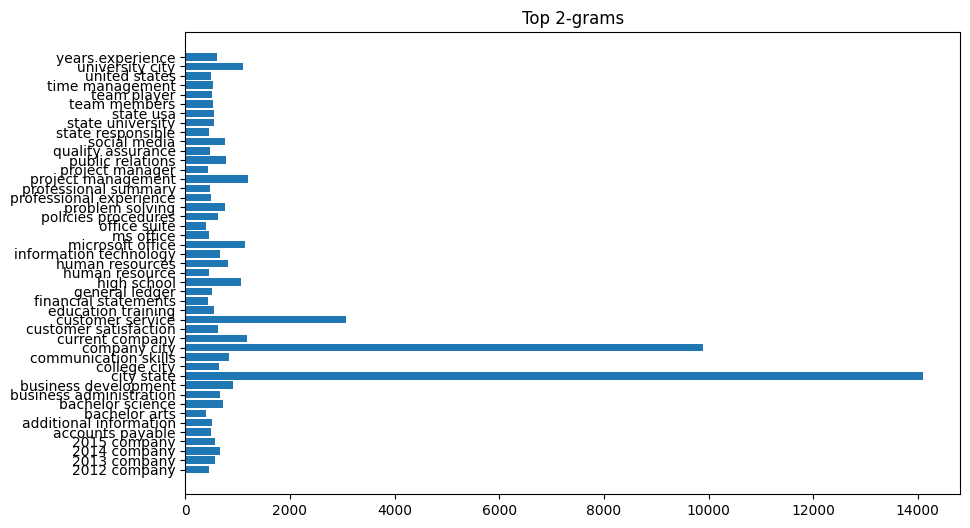

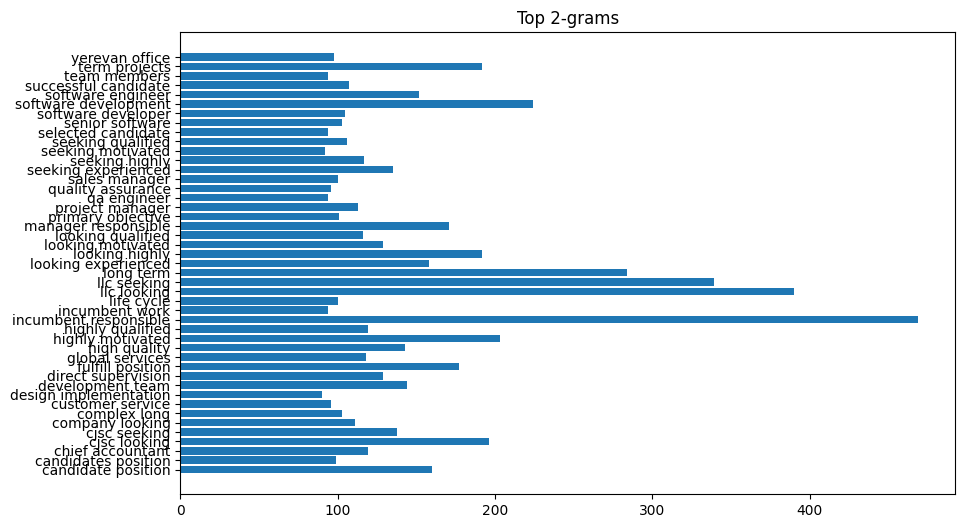

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram analysis
def plot_top_ngrams(text_series, n=2, top_k=45):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english',
                               max_features=top_k)
    X = vectorizer.fit_transform(text_series)
    words = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts)
    plt.title(f'Top {n}-grams')
    plt.show()

# Compare bigrams in resumes vs job postings
plot_top_ngrams(resume_df['Resume_str'], n=2)
plot_top_ngrams(job_posts_df['JobDescription'], n=2)

# Checkpoint #3 - Data Annotation

define weights for: skills, experience, education, semantic similarity, domain
creates labels (good match/top 25% = 1, bad match/bottom 25% = 0)


# SCORING CONFIGURATION AND KEYWORD DEFINITIONS

 This section defines:
 1. Feature weights — how much each category contributes to the final composite score.
 2. Domain-specific keywords — used to detect the job domain (e.g., HR, finance, IT).
 3. Common skill keywords — used to evaluate skill overlap between job and resume.
4. Education levels — mapped to numeric values for scoring academic background.
 5. Experience indicators — keywords representing seniority or management experience.



In [56]:
from collections import Counter

In [57]:
#define weights
weights = {
    'skills': 0.35,
    'experience': 0.20,
    'education': 0.15,
    'semantic': 0.15,
    'domain': 0.15
}


domain_keywords = {
    'hr': [
        'human resources', 'hr', 'recruitment', 'recruiting', 'hiring',
        'payroll', 'benefits', 'employee relations', 'compensation',
        'performance management', 'talent acquisition', 'training',
        'onboarding', 'diversity', 'compliance', 'employee engagement',
        'career development', 'hr policies', 'conflict resolution',
        'organizational development', 'leadership', 'communication skills',
        'workplace safety', 'microsoft office', 'workforce planning',
        'hr analytics', 'labor law', 'employee retention'
    ],

    'finance': [
        'finance', 'financial', 'accounting', 'budget', 'budgeting', 'audit', 'tax',
        'bookkeeping', 'financial analysis', 'forecasting', 'financial modeling',
        'cash flow', 'profit', 'loss', 'ledger', 'accounts payable',
        'accounts receivable', 'payable', 'receivable', 'valuation',
        'cost analysis', 'financial reporting', 'economics', 'treasury',
        'capital markets', 'credit', 'debit', 'banking', 'investment',
        'excel', 'power bi', 'data analysis'
    ],

    'it': [
        'programming', 'software', 'development', 'software development',
        'software engineer', 'python', 'java', 'sql', 'database', 'web development',
        'network', 'system administration', 'cloud', 'aws', 'azure', 'gcp',
        'devops', 'docker', 'kubernetes', 'linux', 'git', 'version control',
        'testing', 'debugging', 'api', 'backend', 'frontend', 'node.js', 'react',
        'data science', 'machine learning', 'tensorflow', 'automation',
        'cybersecurity'
    ],

    'sales': [
        'sales', 'business development', 'account management', 'revenue', 'crm',
        'client', 'customer', 'lead generation', 'cold calling', 'prospecting',
        'presentation', 'closing deals', 'negotiation', 'pipeline', 'quota',
        'target', 'territory', 'upselling', 'cross-selling', 'b2b', 'b2c',
        'account executive', 'retail', 'merchandising', 'promotion', 'marketing',
        'sales strategy', 'partnerships', 'client relations', 'relationship management',
        'sales operations', 'business partnerships'
    ],

    'administration': [
        'administrative', 'secretary', 'assistant', 'coordination', 'office',
        'organization', 'communication', 'customer service', 'documentation',
        'inventory', 'scheduling', 'calendar management', 'data entry', 'filing',
        'record keeping', 'reception', 'travel arrangements', 'correspondence',
        'procurement', 'clerical', 'executive assistant', 'meeting planning',
        'office management', 'support staff', 'event planning', 'vendor management',
        'front desk', 'logistics', 'supplies', 'records management',
        'budget tracking', 'document control', 'office coordination',
        'front office', 'mail management'
    ],

    'research': [
        'research', 'analyst', 'analysis', 'data analysis', 'methodology',
        'report', 'evaluation', 'literature review', 'hypothesis', 'experiment',
        'survey', 'study', 'quantitative', 'qualitative', 'statistics', 'modeling',
        'scientific', 'investigation', 'findings', 'insight', 'insights',
        'publication', 'predictive modeling', 'data visualization',
        'policy analysis', 'impact assessment', 'data collection', 'r',
        'spss', 'tableau', 'power bi'
    ]
}


skills = ['excel', 'word', 'powerpoint', 'sql', 'python', 'project management', 'data analysis', 'ms office', 'microsoft office']

education_levels = {'phd': 4, 'master': 3, 'bachelor': 2, 'associate': 1, 'diploma': 0.5}

experience_words = ['manager', 'director', 'senior', 'lead', 'specialist', 'analyst']

In [58]:
def count_keywords_in_series(text_series, domain_keywords):
    """Counts all domain keywords in a pandas Series of text efficiently."""
    domain_counts = {domain: 0 for domain in domain_keywords}
    keyword_counts = Counter()
    
    for domain, keywords in domain_keywords.items():
        for kw in keywords:
            # Build a regex for full word or phrase match (case-insensitive)
            pattern = rf'\b{re.escape(kw.lower())}\b'
            # Sum counts across all rows
            count = text_series.str.count(pattern, flags=re.IGNORECASE).sum()
            if count > 0:
                domain_counts[domain] += count
                keyword_counts[(domain, kw)] += count
                
    return domain_counts, keyword_counts

resume_domain_counts, resume_kw_counts = count_keywords_in_series(resume_df['Resume_str'], domain_keywords)
job_domain_counts, job_kw_counts = count_keywords_in_series(job_posts_df['job_text'], domain_keywords)


domain_summary = pd.DataFrame({
    'domain': list(domain_keywords.keys()),
    'resume_keyword_count': [resume_domain_counts[d] for d in domain_keywords],
    'job_keyword_count': [job_domain_counts[d] for d in domain_keywords]
}).sort_values(by='resume_keyword_count', ascending=False)

# Optional: detailed keyword-level breakdown
resume_kw_df = pd.DataFrame(resume_kw_counts.items(), columns=['(domain, keyword)', 'resume_count'])
job_kw_df = pd.DataFrame(job_kw_counts.items(), columns=['(domain, keyword)', 'job_count'])




In [59]:
# Show top 10 keywords by count
print("=== Resume Keyword Counts (Top 30) ===")
display(resume_kw_df.sort_values('resume_count', ascending=False).head(30))

print("=== Job Keyword Counts (Top 30) ===")
display(job_kw_df.sort_values('job_count', ascending=False).head(30))


=== Resume Keyword Counts (Top 30) ===


,"(domain, keyword)",resume_count
93,"(sales, sales)",8275
99,"(sales, customer)",7927
61,"(it, development)",5731
11,"(hr, training)",5637
118,"(sales, marketing)",4489
28,"(finance, financial)",4227
129,"(administration, office)",4186
98,"(sales, client)",3259
161,"(research, analysis)",3052
132,"(administration, customer service)",3004


=== Job Keyword Counts (Top 30) ===


,"(domain, keyword)",job_count
60,"(it, development)",8546
59,"(it, software)",6315
123,"(administration, communication)",3608
87,"(sales, sales)",2723
27,"(finance, financial)",2653
121,"(administration, office)",2542
110,"(sales, marketing)",2151
28,"(finance, accounting)",1998
78,"(it, testing)",1950
20,"(hr, communication skills)",1868


In [60]:

print("=== Domain-Level Keyword Summary ===")
print(domain_summary, "\n")

print("=== Sample Keyword-Level Breakdown (Top 10) ===")
print(resume_kw_df.sort_values('resume_count', ascending=False))

=== Domain-Level Keyword Summary ===
           domain  resume_keyword_count  job_keyword_count
3           sales                 30864              10121
4  administration                 23920              12099
1         finance                 22616              12041
0              hr                 19980               5406
2              it                 15649              26629
5        research                  9571               5943 

=== Sample Keyword-Level Breakdown (Top 10) ===
                   (domain, keyword)  resume_count
93                    (sales, sales)          8275
99                 (sales, customer)          7927
61                 (it, development)          5731
11                    (hr, training)          5637
118               (sales, marketing)          4489
..                               ...           ...
166    (research, literature review)             2
181  (research, predictive modeling)             1
86                     (it, node.js)     

In [61]:
kw_compare = pd.merge(
    resume_kw_df, job_kw_df,
    on='(domain, keyword)', how='outer'
).fillna(0)

kw_compare['difference'] = kw_compare['resume_count'] - kw_compare['job_count']

# Show top 20 overrepresented in resumes
kw_compare.sort_values('difference', ascending=False).head(20)


,"(domain, keyword)",resume_count,job_count,difference
171,"(sales, customer)",7927.0,1632.0,6295.0
185,"(sales, sales)",8275.0,2723.0,5552.0
91,"(hr, training)",5637.0,993.0,4644.0
8,"(administration, customer service)",3004.0,344.0,2660.0
173,"(sales, marketing)",4489.0,2151.0,2338.0
165,"(sales, client)",3259.0,1080.0,2179.0
17,"(administration, inventory)",2287.0,215.0,2072.0
82,"(hr, leadership)",2400.0,498.0,1902.0
21,"(administration, office)",4186.0,2542.0,1644.0
41,"(finance, budget)",2141.0,539.0,1602.0


Computes a basic semantic similarity between a resume and job posting.

Steps:
1. Converts both texts to lowercase.
2. Splits them into sets of unique words.
3. Finds the overlap (intersection) between the two word sets.
4. Returns the proportion of job words also present in the resume.

Note:
    This is a simple lexical overlap metric, not a deep semantic one.
    It can later be replaced with embedding-based cosine similarity.

Args:
    resume_text (str): Resume text.
    job_text (str): Job posting text.

Returns:
    float: Overlap ratio between 0 and 1.

In [62]:
def calculate_semantic_score(resume_text, job_text):
    resume_words = set(resume_text.lower().split())
    job_words = set(job_text.lower().split())
    if not job_words:
        return 0
    overlap = len(resume_words.intersection(job_words))
    return overlap / len(job_words) if overlap > 0 else 0


Calculates how well a resume matches the skills required by a job posting.

Steps:
1. Converts both resume and job descriptions to lowercase.
2. Extracts all skill keywords that appear in the job text.
3. Checks which of those required skills also appear in the resume.
4. Returns the ratio of matched skills to total job-required skills.

Args:
    resume_text (str): Full resume text.
    job_text (str): Combined job description and requirements text.

Returns:
    float: Skill match score between 0 and 1.
            Returns 0 if no skills were found in the job text.

In [63]:
def calculate_skills_score(resume_text, job_text):
    resume_lower = resume_text.lower()
    job_lower = job_text.lower()
    job_skills = [skill for skill in skills if skill in job_lower]
    if not job_skills:
        return 0
    resume_skills = [skill for skill in job_skills if skill in resume_lower]
    return len(resume_skills) / len(job_skills)


Estimates the candidate's experience level from their resume.

Steps:
1. Converts text to lowercase.
2. Searches for any mention of "X years" to estimate years of experience.
3. Counts seniority-related keywords like 'manager', 'senior', etc.
4. Combines both measures into a normalized score:
    (years / 10) + (experience_keywords / 5), capped at 1.0.

Args:
    resume_text (str): Full resume text.

Returns:
    float: Experience score between 0 and 1.

In [64]:
def calculate_experience_score(resume_text):
    text_lower = resume_text.lower()
    years_matches = re.findall(r'(\d+)\s*(?:years?|yrs?)', text_lower)
    max_years = max([int(year) for year in years_matches]) if years_matches else 0
    exp_count = sum(1 for word in experience_words if word in text_lower)
    return min((max_years / 10) + (exp_count / 5), 1.0)

Determines the highest education level mentioned in the resume.

Steps:
1. Converts resume to lowercase.
2. Checks for mentions of education keywords ('phd', 'master', etc.).
3. Maps the highest degree found to a numeric value from education_levels.
4. Normalizes by dividing by 4 (the highest possible score).

Args:
    resume_text (str): Full resume text.

Returns:
    float: Education score between 0 and 1.
            Higher degrees produce higher scores.

In [65]:
def calculate_education_score(resume_text):
    text_lower = resume_text.lower()
    max_education = 0
    for level, score in education_levels.items():
        if level in text_lower:
            max_education = max(max_education, score)
    return min(max_education / 4, 1.0)

Evaluates whether the resume and job post belong to the same domain/industry.

Steps:
1. Identifies the job's domain (HR, IT, finance, etc.) based on domain_keywords.
2. Counts how many domain-specific keywords appear in the job description.
3. Checks how many of those same keywords appear in the resume.
4. Returns the ratio of matching domain keywords.
    If the job domain cannot be determined, returns a neutral 0.5.

Args:
    resume_text (str): Resume text.
    job_text (str): Job posting text.

Returns:
    float: Domain relevance score between 0 and 1.

In [66]:
def calculate_domain_score(resume_text, job_text):
    resume_lower = resume_text.lower()
    job_lower = job_text.lower()
    job_domain = 'general'
    max_domain_score = 0
    for domain, keywords in domain_keywords.items():
        domain_score = sum(1 for keyword in keywords if keyword in job_lower)
        if domain_score > max_domain_score:
            max_domain_score = domain_score
            job_domain = domain
    if job_domain == 'general':
        return 0.5
    domain_keywords_list = domain_keywords[job_domain]
    matches = sum(1 for keyword in domain_keywords_list if keyword in resume_lower)
    return min(matches / len(domain_keywords_list), 1.0)

Calculates the overall match score between a resume and a job posting
by combining all five sub-scores using predefined feature weights.

Steps:
1. Calls each of the five scoring functions:
        - calculate_skills_score
        - calculate_experience_score
        - calculate_education_score
        - calculate_domain_score
        - calculate_semantic_score
2. Stores each sub-score in a dictionary for transparency.
3. Computes a weighted average using the 'weights' dictionary defined earlier.
4. Returns both the final composite score and the individual component scores.

Formula:
    final_score = Σ (weight_i × score_i)
    where i ∈ {skills, experience, education, domain, semantic}

Args:
    resume_text (str): Full resume text.
    job_text (str): Combined job description and requirements text.

Returns:
    tuple:
        - final_score (float): Overall weighted fit score (0–1 range).
        - scores (dict): Dictionary of component scores for analysis and debugging.

In [67]:
#final score
def calculate_composite_score(resume_text, job_text):
    scores = {
        'skills': calculate_skills_score(resume_text, job_text),
        'experience': calculate_experience_score(resume_text),
        'education': calculate_education_score(resume_text),
        'domain': calculate_domain_score(resume_text, job_text),
        'semantic': calculate_semantic_score(resume_text, job_text)
    }
    final_score = sum(weights[component] * scores[component] for component in scores.keys())
    return final_score, scores

GENERATE TRAINING PAIRS: JOB POSTINGS ↔ TOP-MATCHING RESUMES

Purpose:
This section builds the annotated dataset that pairs each job posting
with its top matching resumes, using the composite scoring system.

Process:
1. Takes a sample of job postings (first 100 for efficiency).
2. For each job posting:
   • Retrieves the combined job text (title, description, requirements, etc.)
   • Iterates through every resume in the dataset.
   • Uses calculate_composite_score() to compute a weighted “fit score”
     based on skills, experience, education, domain, and semantic similarity.
3. Stores each (job, resume) pair along with its detailed component scores.
4. Sorts the resumes by their final score and keeps only the top 10 matches per job.
5. Appends all top results into a single DataFrame called training_pairs.

Outcome:
A structured dataset containing job–resume pairs, ranked by relevance scores,
which will later be used for labeling and potential supervised model training.



In [68]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

def process_one_job(job_idx, job_row, resume_df, calculate_composite_score):
    job_title = job_row['Title']
    job_text = job_row['job_text']

    resume_results = []

    for resume_idx, resume_row in resume_df.iterrows():
        resume_text = resume_row['Resume_str']
        resume_id = resume_row['ID']
        final_score, component_scores = calculate_composite_score(resume_text, job_text)
        
        resume_results.append({
            'job_idx': job_idx,
            'resume_idx': resume_idx,
            'job_title': job_title,
            'resume_id': resume_id,
            'final_score': final_score,
            **component_scores  # Include component breakdowns
        })

    # Pick top 10 efficiently
    resume_results.sort(key=lambda x: x['final_score'], reverse=True)
    return resume_results[:10]


def generate_training_pairs_parallel(job_posts_df, resume_df, calculate_composite_score):
    job_sample = job_posts_df
    
    training_data = Parallel(n_jobs=-1, backend="loky")(
        delayed(process_one_job)(idx, row, resume_df, calculate_composite_score)
        for idx, row in job_sample.iterrows()
    )

    training_data_flat = [x for sublist in training_data for x in sublist]
    training_pairs = pd.DataFrame(training_data_flat)

    print(f"Processed {len(job_sample)} jobs in parallel.")
    return training_pairs


# Run it
training_pairs = generate_training_pairs_parallel(job_posts_df, resume_df, calculate_composite_score)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Processed 5448 jobs in parallel.


"""
LABEL GENERATION: CONVERT CONTINUOUS SCORES INTO CATEGORICAL CLASSES

Purpose:
This section transforms the continuous "final_score" values into discrete
labels (1 = good fit, 0 = poor fit) to enable supervised learning or
evaluation later on.

Process:
1. Extracts all final composite scores from the training_pairs DataFrame.
2. Calculates score thresholds using quartiles:
   • High threshold (75th percentile) → top-performing resumes.
   • Low threshold (25th percentile) → least suitable resumes.
3. Assigns labels based on these cutoffs:
   • 1  → score ≥ high_threshold (good fit)
   • 0  → score ≤ low_threshold (poor fit)
   • -1 → scores in the middle range (ambiguous, excluded)
4. Filters out all -1 entries to keep only clearly positive and negative examples.

Outcome:
Creates labeled_training_data — a balanced dataset of strong and weak
resume–job matches suitable for training or evaluating future models.
"""


In [69]:
#labels
scores = training_pairs['final_score']
high_threshold = scores.quantile(0.75)
low_threshold = scores.quantile(0.25)

print(f"Score thresholds: High={high_threshold:.3f}, Low={low_threshold:.3f}")

labels = []
for score in scores:
    if score >= high_threshold:
        labels.append(1)
    elif score <= low_threshold:
        labels.append(0)
    else:
        labels.append(-1)

training_pairs['label'] = labels
labeled_training_data = training_pairs[training_pairs['label'] != -1].copy()


Score thresholds: High=0.762, Low=0.645


In [70]:
# annotated dataset
output_file = 'resume_job_training_data.csv'
labeled_training_data.to_csv(output_file, index=False)

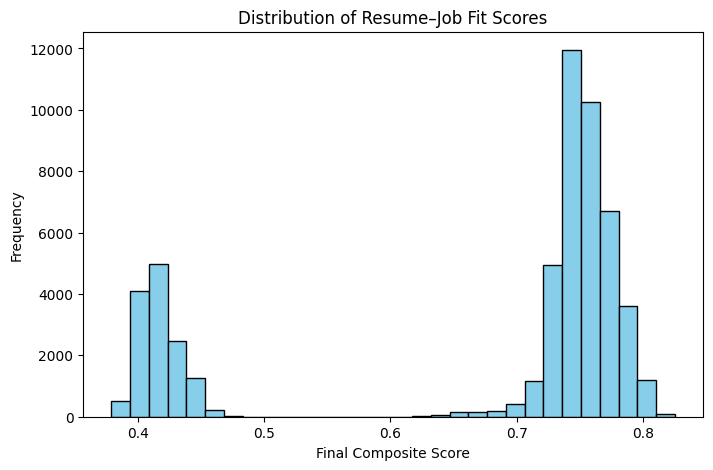

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(training_pairs["final_score"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Resume–Job Fit Scores")
plt.xlabel("Final Composite Score")
plt.ylabel("Frequency")
plt.show()
